# CHATBOTS - Using Natural Language Processing and Tensorflow

In this Jupyter Notebook, We are going to Build a Chatbot that Understands the Context of Sentense and Respond accordingly.
These are the Things that we are going to do in this Project -
1. Transforming the Conversational Intents into Tensorflow model (Neural Network using TFLEARN) using NLP and Save it as Pickle also.
2. Load the Same Pickle and Model to Build the Framework to Process the Responses.
3. At Last, We Show How the Inputs are Processed and Give the Reponses.
-------------------------------------------------------------------------------------------------------

##### TFLEARN  - TFlearn is a modular and transparent deep learning library built on top of Tensorflow. It was designed to provide a higher-level API to TensorFlow in order to facilitate and speed-up experimentations, while remaining fully transparent and compatible with it.  (http://tflearn.org/)
-------------------------------------------------------------------------------------------------------
##### TENSORFLOW - TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.


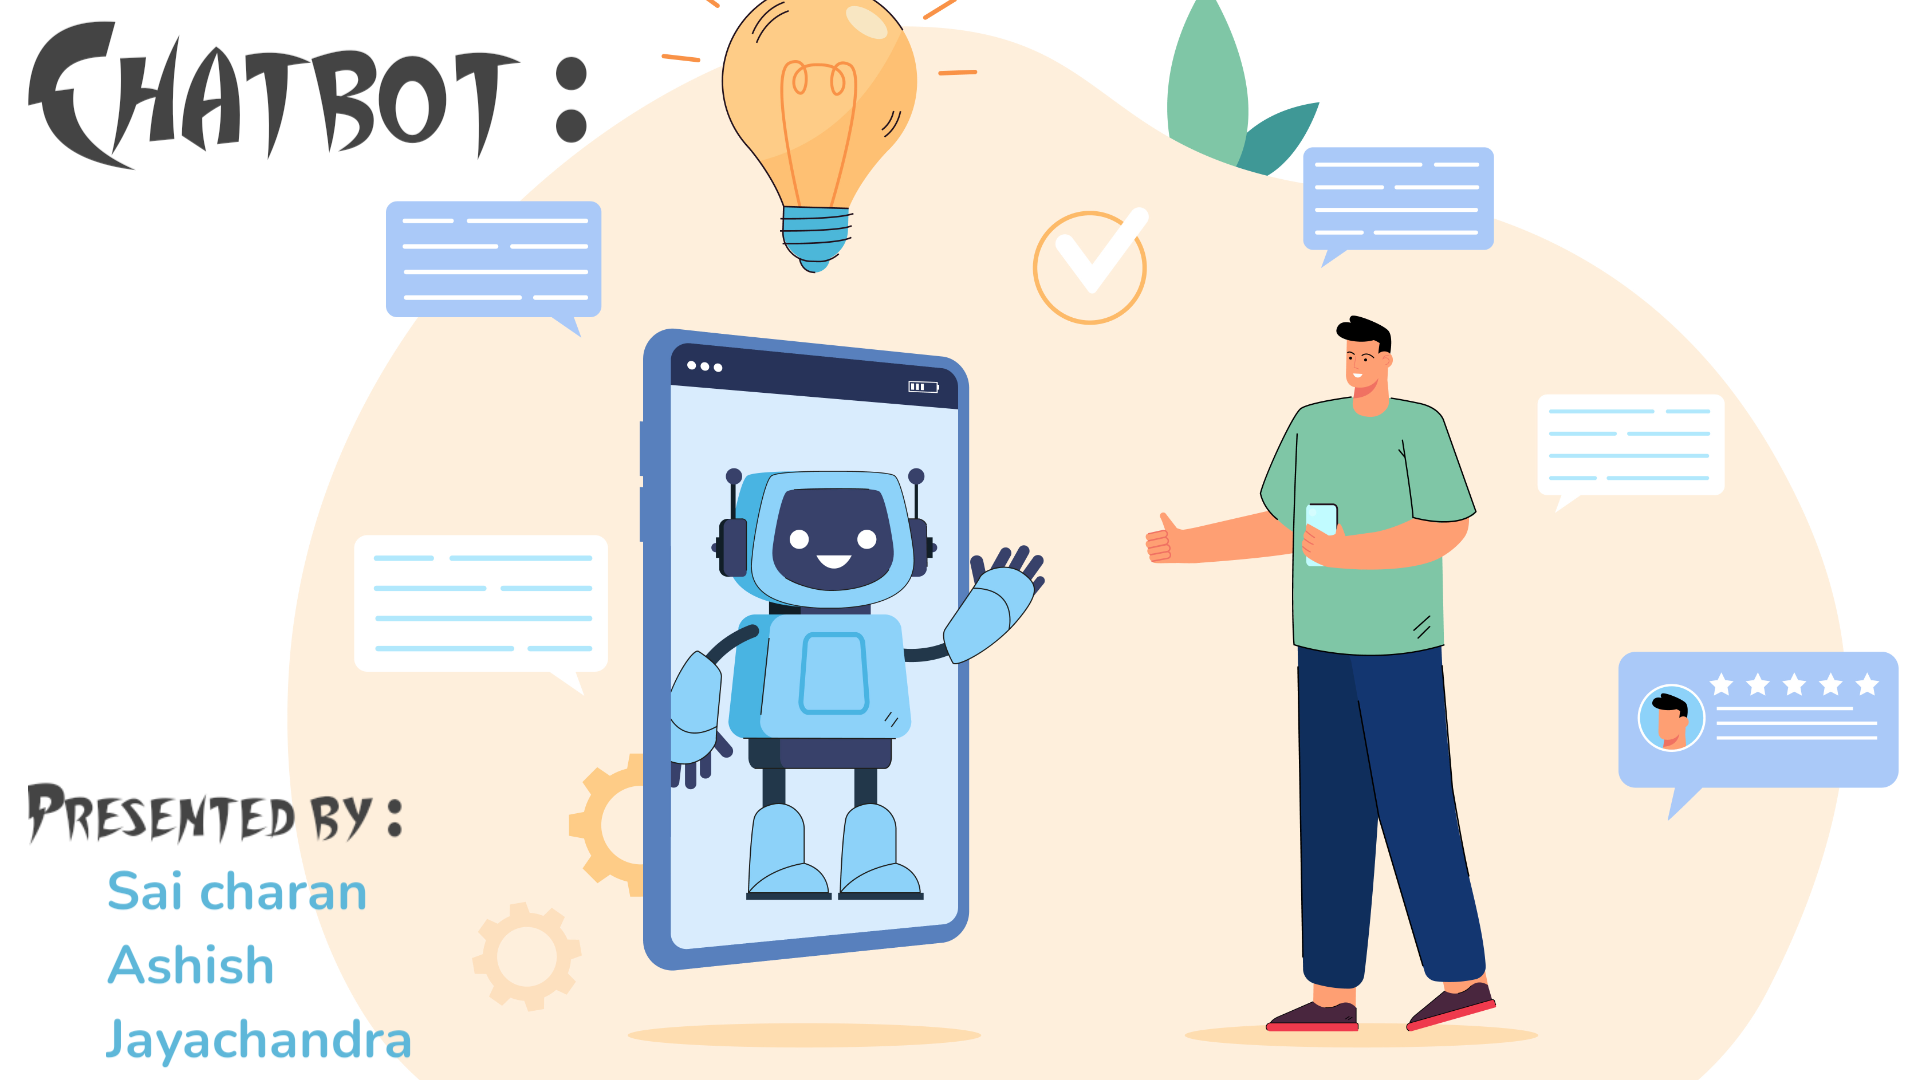

In [1]:
from IPython.display import Image, display
display(Image('Untitled.png'))

In [2]:
pip install tflearn

  Using cached tflearn-0.5.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Used in Tensorflow Model
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tflearn
import random

#Usde to for Contextualisation and Other NLP Tasks.
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

#Other
import json
import pickle
import warnings
warnings.filterwarnings("ignore")

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Scipy not supported!


In [4]:
print("Processing the Intents.....")
with open('intents.json') as json_data:
    intents = json.load(json_data)

Processing the Intents.....


In [5]:
words = []
classes = []
documents = []
ignore_words = ['?', '_', '!', '-']
print("Looping through the Intents to Convert them to words, classes, documents and ignore_words.......")
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

Looping through the Intents to Convert them to words, classes, documents and ignore_words.......


In [6]:
print("Stemming, Lowering and Removing Duplicates.......")
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

Stemming, Lowering and Removing Duplicates.......
506 documents
105 classes ['Fare Enquiry', 'Flight_Booking', 'VIP_services_enquiry', 'air_sickness_enquiry', 'aircraft_type_enquiry', 'airport_codes_enquiry', 'airport_facilities', 'airport_layout_enquiry', 'airport_navigation', 'airport_parking_enquiry', 'airport_security_measures', 'airport_transfer', 'alcohol_policy', 'appreciate', 'baggage_claim', 'baggage_enquiry', 'baggage_storage_enquiry', 'bicycle_transportation', 'boarding_pass_enquiry', 'boarding_policy', 'cabin_luggage_policy', 'cancellation_policy', 'car_rental_enquiry', 'cargo_services_enquiry', 'carry-on_policy', 'charter_flight_enquiry', 'check-in_enquiry', 'check-in_policy', 'children_travel', 'customer_feedback', 'customer_rights_enquiry', 'customer_support', 'customs_check', 'damaged_luggage', 'damaged_property_enquiry', 'developer', 'excess_baggage_fees', 'exclaim', 'flight_attendant_assistance', 'flight_cancellation', 'flight_change', 'flight_complaints', 'flight_com

In [7]:
print("Creating the Data for our Model.....")
training = []
output = []
print("Creating an List (Empty) for Output.....")
output_empty = [0] * len(classes)

print("Creating Traning Set, Bag of Words for our Model....")
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

Creating the Data for our Model.....
Creating an List (Empty) for Output.....
Creating Traning Set, Bag of Words for our Model....


In [8]:
print("Shuffling Randomly and Converting into Numpy Array for Faster Processing......")
random.shuffle(training)
training = np.array(training)

print("Creating Train and Test Lists.....")
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Building Neural Network for Out Chatbot to be Contextual....")
print("Resetting graph data....")
tf.reset_default_graph()

Shuffling Randomly and Converting into Numpy Array for Faster Processing......
Creating Train and Test Lists.....
Building Neural Network for Out Chatbot to be Contextual....
Resetting graph data....


In [9]:
net = tflearn.input_data(shape=[None, len(train_x[0])])
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
net = tflearn.regression(net)
print("Training....")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Training....


In [10]:
model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')

In [11]:
try:
    print("Loading the Model......")
    model.load("./model.tflearn")
except:
    print("Training the Model.......")
    model.fit(train_x, train_y, n_epoch=1000, batch_size=8,show_metric=True)
    print("Saving the Model.......")
    model.save('model.tflearn')

Loading the Model......
INFO:tensorflow:Restoring parameters from C:\Users\Sai Charan\OneDrive\Documents\chatbot intents\model.tflearn


In [12]:
print("Pickle is also Saved..........")
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )

Pickle is also Saved..........


In [13]:
print("Loading Pickle.....")
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']


with open('intents.json') as json_data:
    intents = json.load(json_data)
    
#print("Loading the Model......")
#model.load("./model.tflearn")

Loading Pickle.....


In [14]:
def clean_up_sentence(sentence):
    # It Tokenize or Break it into the constituents parts of Sentense.
    sentence_words = nltk.word_tokenize(sentence)
    # Stemming means to find the root of the word.
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# Return the Array of Bag of Words: True or False and 0 or 1 for each word of bag that exists in the Sentence
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

ERROR_THRESHOLD = 0.8
print("ERROR_THRESHOLD = 0.8")

def classify(sentence):
    # Prediction or To Get the Posibility or Probability from the Model
    results = model.predict([bow(sentence, words)])[0]
    # Exclude those results which are Below Threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # Sorting is Done because heigher Confidence Answer comes first.
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1])) #Tuppl -> Intent and Probability
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # That Means if Classification is Done then Find the Matching Tag.
    if results:
        # Long Loop to get the Result.
        while results:
            for i in intents['intents']:
                # Tag Finding
                if i['tag'] == results[0][0]:
                    # Random Response from High Order Probabilities
                    return print(random.choice(i['responses']))

            results.pop(0)

ERROR_THRESHOLD = 0.8


In [15]:
while True:
    input_data = input("You- ")
    answer = response(input_data)
    answer
    if input_data.lower() == "quit" or input_data==None:
        break

You- hello
Hi there! How can I help you today?
You- quit


In [19]:
import tkinter as tk
from tkinter import scrolledtext

# Create the main window
root = tk.Tk()
root.geometry("400x500")
root.title("Chatbot")

# Create a text box to display the chat history
history = scrolledtext.ScrolledText(root, width=50, height=20)
history.pack(padx=10, pady=10)

# Create an input box for the user to enter messages
input_box = tk.Entry(root, width=50)
input_box.pack(padx=10, pady=10)

# Function to handle sending messages
def send_message(event=None):
    # Get the user's input
    user_input = input_box.get()
    # Add the user's message to the chat history
    history.insert(tk.END, "You: " + user_input + "\n")
    # Get the bot's response
    response = get_response(user_input)
    # Add the bot's response to the chat history
    history.insert(tk.END, "Bot: " + response + "\n")
    # Clear the input box
    input_box.delete(0, tk.END)

# Bind the Enter key to the send_message function
root.bind("<Return>", send_message)

# Function to get the bot's response
def get_response(user_input):
    # Use the classify and response functions from the chatbot code
    results = classify(user_input)
    if results:
        while results:
            for i in intents['intents']:
                if i['tag'] == results[0][0]:
                    return random.choice(i['responses'])
            results.pop(0)
    else:
        return "I'm sorry, I don't understand that."

# Start the main loop
root.mainloop()

# sample GUI for the chatbot

In [ ]:
project = model.load("./model.tflearn")

intents = json.loads(open('intents.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

def clean_up_sentence(sentence):
    # It Tokenize or Break it into the constituents parts of Sentense.
    sentence_words = nltk.word_tokenize(sentence)
    # Stemming means to find the root of the word.
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# Return the Array of Bag of Words: True or False and 0 or 1 for each word of bag that exists in the Sentence
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

ERROR_THRESHOLD = 0.8
print("ERROR_THRESHOLD = 0.8")

def classify(sentence):
    # Prediction or To Get the Posibility or Probability from the Model
    results = model.predict([bow(sentence, words)])[0]
    # Exclude those results which are Below Threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # Sorting is Done because heigher Confidence Answer comes first.
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1])) #Tuppl -> Intent and Probability
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # That Means if Classification is Done then Find the Matching Tag.
    if results:
        # Long Loop to get the Result.
        while results:
            for i in intents['intents']:
                # Tag Finding
                if i['tag'] == results[0][0]:
                    # Random Response from High Order Probabilities
                    return random.choice(i['responses'])

            results.pop(0)           
            
#Creating GUI with tkinter
import tkinter
from tkinter import *

def send(event=None):
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)
    
    if msg == 'quit':
        base.destroy()  # exit the program if the user entered "quit"
    elif msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#333333", font=("Arial", 14))
    
        res = response(msg)
        if res is not None:
            ChatLog.insert(END, "Bot: " + res + '\n\n')
            
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)


base = Tk()
base.title("Chatbot")
base.geometry("1300x575")
base.configure(bg="#444444")
base.resizable(width=False, height=False)

#Create Chat window
ChatLog = Text(base, bd=0, bg="#ffffff", height="10", width="60", font=("Arial", 14),)

ChatLog.config(state=DISABLED)

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="hand2")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Arial",16), text="Send", width="10", height=3,
                    bd=0, bg="#0080ff", activebackground="#0059b3",fg='#ffffff',
                    command=send)

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="#ffffff", width="40", height="4", font=("Arial", 14))
EntryBox.bind("<Return>", send)  # bind the "Enter" key to the send function

#Place all components on the screen
ChatLog.place(x=20,y=20, height=420, width=1250)
scrollbar.place(x=1250, y=20, height=420)
EntryBox.place(x=20, y=460, height=100, width=1100)
SendButton.place(x=1149, y=457, height=100)

base.mainloop()


INFO:tensorflow:Restoring parameters from C:\Users\Sai Charan\OneDrive\Documents\chatbot intents\model.tflearn
ERROR_THRESHOLD = 0.8
